In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/AllPlayerYesSalaryYesCluster.csv")

In [3]:
df.columns

Index(['Unnamed: 0', '3P', '3P%', '2P', '2P%', 'FT%', 'ORB', 'DRB', 'AST',
       'STL', 'BLK', 'TOV', 'PTS', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%',
       'USG%', 'PG%', 'SG%', 'SF%', 'PF%', 'C%', 'PGA', 'Blkd', 'Dist.',
       '%2PFGA', '0-3%FGA', '3-10%FGA', '10-16%FGA', '16-3P%FGA', '%3PFGA',
       '0-3FG%', '3-10FG%', '10-16FG%', '16-3PFG%', '2P%A', '3P%A', 'Dunk%FGA',
       'C3%3PA', 'C33P%', 'TruePos', 'cluster_label'],
      dtype='object')

In [8]:
summary_table.to_csv("ClusterStats.csv")

In [12]:
years = pd.read_csv("../Data/AllPlayerYesSalaryCleaned.csv")
years['Season']

0        2000.0
1        2000.0
2        2000.0
3        2000.0
4        2000.0
          ...  
11202    2023.0
11203    2023.0
11204    2023.0
11205    2023.0
11206    2023.0
Name: Season, Length: 11207, dtype: float64

In [13]:
df['Season'] = years['Season']

In [14]:
gmm = pd.read_csv("../Data/DataWithGMMLabel.csv")
gmm['Season'] = years['Season']

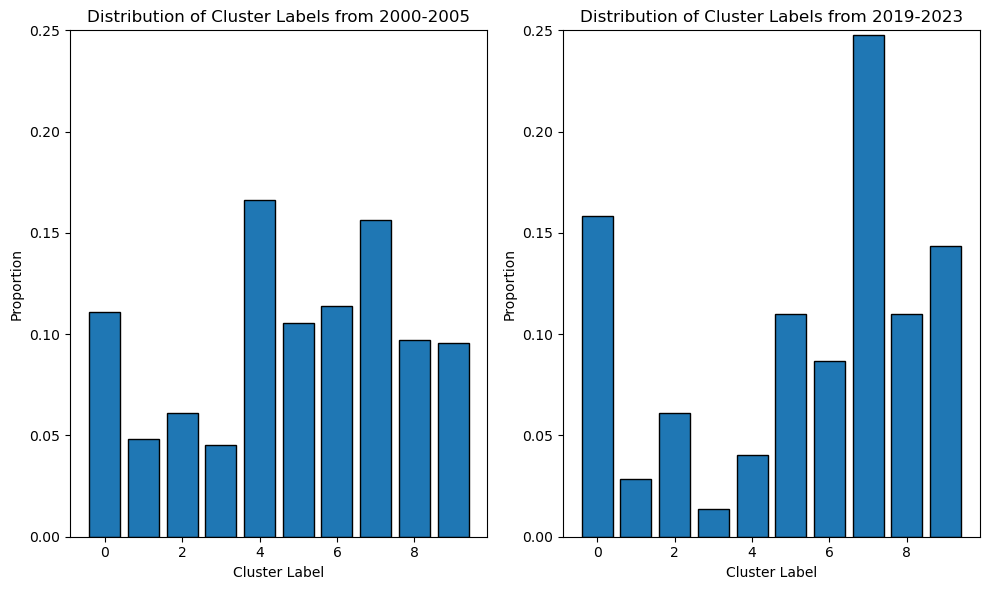

In [21]:
old = gmm[gmm['Season'] < 2005]
new = gmm[gmm['Season'] > 2018]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot for the first DataFrame (df1)
prop_old = old['label'].value_counts(normalize=True)
axes[0].bar(prop_old.index, prop_old, edgecolor='black')
axes[0].set_title('Distribution of Cluster Labels from 2000-2005')
axes[0].set_xlabel('Cluster Label')
axes[0].set_ylabel('Proportion')
axes[0].set_ylim(0, 0.25)

# Plot for the second DataFrame (df2)
prop_new = new['label'].value_counts(normalize=True)
axes[1].bar(prop_new.index, prop_new, edgecolor='black')
axes[1].set_title('Distribution of Cluster Labels from 2019-2023')
axes[1].set_xlabel('Cluster Label')
axes[1].set_ylabel('Proportion')
axes[1].set_ylim(0, 0.25)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.savefig('ClusterCountsByYear.png')

In [27]:
summary_table = gmm.groupby('label').agg({
    '3P%': 'mean',
    'DRB': 'mean',
    'ORB':  'mean',
    'AST': 'mean',
    'STL': 'mean',
    'BLK': 'mean',
    'TOV': 'mean',
    'PTS': 'mean',
    'USG%': 'mean',
    'Dist.': 'mean',
    'Salary': 'mean'
    # Add other variables here
}).round(2).reset_index()

# Display the summary table
print(summary_table)

   label   3P%   DRB   ORB   AST   STL   BLK   TOV    PTS   USG%  Dist.  \
0      0  0.35  1.42  0.28  1.94  0.55  0.12  0.88   5.89  17.24  17.64   
1      1  0.01  5.62  2.77  1.27  0.66  1.37  1.55  10.61  17.95   4.75   
2      2  0.32  5.96  2.08  2.73  0.94  0.97  2.07  17.00  23.83  10.42   
3      3  0.11  1.02  0.40  1.06  0.38  0.13  0.58   2.68  16.25  11.54   
4      4  0.01  2.12  1.17  0.46  0.31  0.55  0.66   3.72  15.06   5.85   
5      5  0.29  1.36  0.42  1.50  0.48  0.15  0.81   4.49  17.43  13.58   
6      6  0.20  3.72  1.79  1.13  0.55  0.71  1.16   8.25  18.50   7.95   
7      7  0.36  2.64  0.59  3.11  0.92  0.27  1.52  11.48  19.66  15.66   
8      8  0.35  4.17  1.09  3.57  1.15  0.47  2.15  17.32  23.66  13.68   
9      9  0.32  2.57  0.97  1.20  0.57  0.41  0.91   6.59  17.64  12.18   

        Salary  
0   2976904.41  
1   7547642.42  
2  10825861.61  
3   1824023.64  
4   2777721.01  
5   2187822.72  
6   5015528.24  
7   6455677.06  
8  10432064.25  
9   

In [25]:
summary_table.to_csv("ClusterStats.csv")